Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
# Imports:
import numpy as np
import pandas as pd
import plotly.express as px
import category_encoders as ce
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
import itertools
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from math import floor
from IPython.display import display, HTML
from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Assignment

- #### Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.  <--- DONE !

- #### Continue to participate in our Kaggle challenge.  <--- DONE !





In [4]:
  # Treat the outlier in latitude:
  train['latitude'] = train['latitude'].replace(-2e-08, 0)

In [5]:
# Look at the stats of the Longitude and Latitude:
train[['longitude', 'latitude']].describe()

longitude      latitude
count  59400.000000  59400.000000
mean      34.077427     -5.706033
std        6.567432      2.946019
min        0.000000    -11.649440
25%       33.090347     -8.540621
50%       34.908743     -5.021597
75%       37.178387     -3.326156
max       40.345193      0.000000

In [6]:
# Plot the longitude and latitude on a scatter map plot:
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='status_group', 
                        opacity=0.5)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [7]:
# Create an array of coordinates for train set:
train_loc = train[['longitude', 'latitude']]
coords = train_loc

# Create an array of coordinates for test set:
test_loc = test[['longitude', 'latitude']]
coords_test = test_loc

# Check my work:
coords.head()

longitude   latitude
0  34.938093  -9.856322
1  34.698766  -2.147466
2  37.460664  -3.821329
3  38.486161 -11.155298
4  31.130847  -1.825359

In [8]:
# Create a Kmeans model for train set:
dist = []
K = range(1, 20)
for k in K:
  kmeans_mod = KMeans(n_clusters=k, random_state=42)
  kmeans_model = kmeans_mod.fit(coords)
  dist.append(kmeans_model.inertia_)

# Create a Kmeans model for test set:
dist2 = []
K2 = range(1, 20)
for k in K2:
  kmeans_mod2 = KMeans(n_clusters=k, random_state=42)
  kmeans_model2 = kmeans_mod2.fit(coords_test)
  dist2.append(kmeans_model2.inertia_)

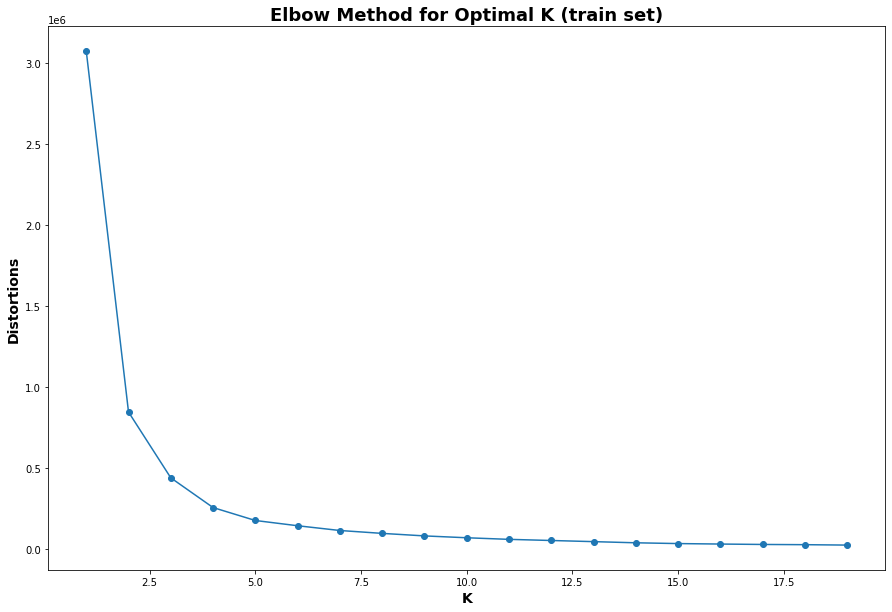

In [9]:
# Create an elbow method for optimal k (train set):
fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')
plt.plot(K, dist, marker='o')
plt.xlabel('K', fontsize=14, fontweight='bold')
plt.ylabel('Distortions', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal K (train set)', size=18, weight='bold');

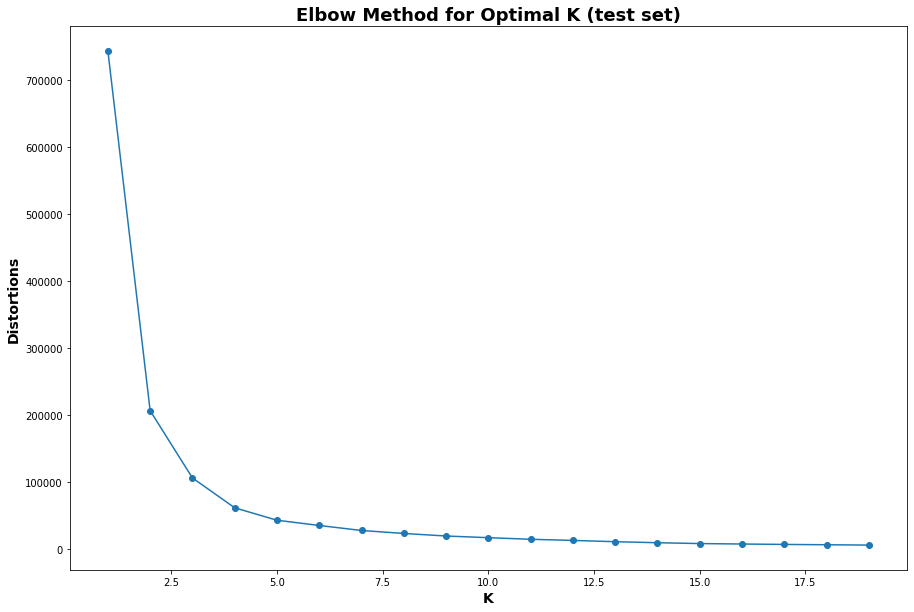

In [10]:
# Create an elbow method for optimal k (test set):
fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')
plt.plot(K2, dist2, marker='o')
plt.xlabel('K', fontsize=14, fontweight='bold')
plt.ylabel('Distortions', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal K (test set)', size=18, weight='bold');

In [11]:
# Use kmeans clustering to engineer a new feature based on elbow method to find k:
kmeans = KMeans(n_clusters=14)
kmeans2 = KMeans(n_clusters=14)

# Fit kmeans:
kmeans.fit(coords)
kmeans2.fit(coords_test)

# Engineer new feature (train):
loc_cluster = kmeans.predict(train[['longitude', 'latitude']])
train['loc_cluster'] = pd.Series(loc_cluster, index=train.index)

# Need to add new feature to test set too:
loc_cluster2 = kmeans2.predict(test[['longitude', 'latitude']])
test['loc_cluster'] = pd.Series(loc_cluster2, index=test.index)

# Check my work:
train.head()

id  amount_tsh  ...    status_group loc_cluster
0  69572      6000.0  ...      functional          10
1   8776         0.0  ...      functional          13
2  34310        25.0  ...      functional          11
3  67743         0.0  ...  non functional           9
4  19728         0.0  ...      functional           4

[5 rows x 42 columns]

In [12]:
# Plot the longitude and latitude on a scatter map plot with clusters (train):
fig = px.scatter_mapbox(train, lat='latitude', lon='longitude', color='loc_cluster', 
                        opacity=0.5)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [13]:
# Plot the longitude and latitude on a scatter map plot with clusters (test):
fig = px.scatter_mapbox(test, lat='latitude', lon='longitude', color='loc_cluster', 
                        opacity=0.5)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

In [14]:
# Look at the new feature's value counts (train):
print ('Observations =', train['loc_cluster'].shape[0], '\n')
print ('Number of Observations with 0:\n\nLongitude =', 
       (train['longitude'] == 0).value_counts()[1], '\n\nLatitude =', 
       (train['latitude'] == 0).value_counts()[1], '\n')
train['loc_cluster'].value_counts(ascending=False)

Observations = 59400 

Number of Observations with 0:

Longitude = 1812 

Latitude = 1812 



0     8505
11    7012
6     5567
13    5534
2     4409
7     4392
3     4171
5     3800
4     3780
9     3161
8     2803
10    2758
1     1812
12    1696
Name: loc_cluster, dtype: int64

In [15]:
# Look at the new feature's value counts (test):
print ('Observations =', test['loc_cluster'].shape[0], '\n')
print ('Number of Observations with 0:\n\nLongitude =\n', 
       (test['longitude'] == 0).value_counts(), '\n\nLatitude =\n', 
       (test['latitude'] == 0).value_counts(), '\n')
test['loc_cluster'].value_counts(ascending=False)

Observations = 14358 

Number of Observations with 0:

Longitude =
 False    13922
True       436
Name: longitude, dtype: int64 

Latitude =
 False    14358
Name: latitude, dtype: int64 



2     1938
0     1669
12    1405
6     1195
5     1099
4     1095
10    1060
8      969
11     931
7      749
3      710
9      686
1      436
13     416
Name: loc_cluster, dtype: int64

In [16]:
# Show all values:
pd.set_option('display.max_rows', 40000)

# Look  at the value counts of wpt_name feature since this is a high cardinality feature:
print (train['wpt_name'].shape[0])
train['wpt_name'].value_counts().sort_values()

59400


Kwababigaya                          1
Kwa Mzee Tang'Na                     1
Tuwei Bariw                          1
Shule Ya Msingi Ikova                1
Kwakibhandobher                      1
Mlango Mmoja                         1
Shule Ya Msingi Bujugo               1
Kwa Lino                             1
Nguwa C                              1
Mpetu Primary                        1
Hemigi                               1
Kwa Fyati                            1
Kwa Budodi                           1
Kwa Mazenyeko                        1
Magwata                              1
Amani B                              1
Ndivwana                             1
Kwa Silvesti Lemnge                  1
Kwa Mwani                            1
Kwa Idd Juma                         1
Kwa Kaja                             1
Kanamira                             1
Mwangoka                             1
Sakila Primary School                1
Kifagilo                             1
Nyakatunguru             

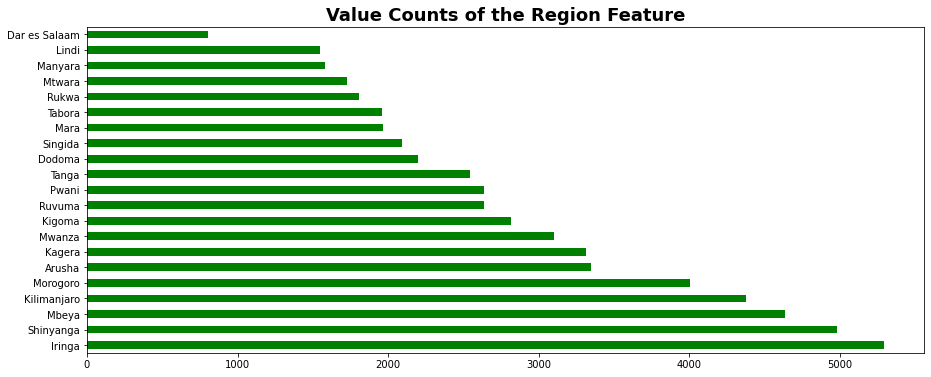

In [17]:
# Look at a bar plot for the values of region:
plt.figure(figsize=(15, 6), facecolor='white')
train['region'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Region Feature', size=18, weight='bold');

# Can feature engineer this feature into a regions feature.

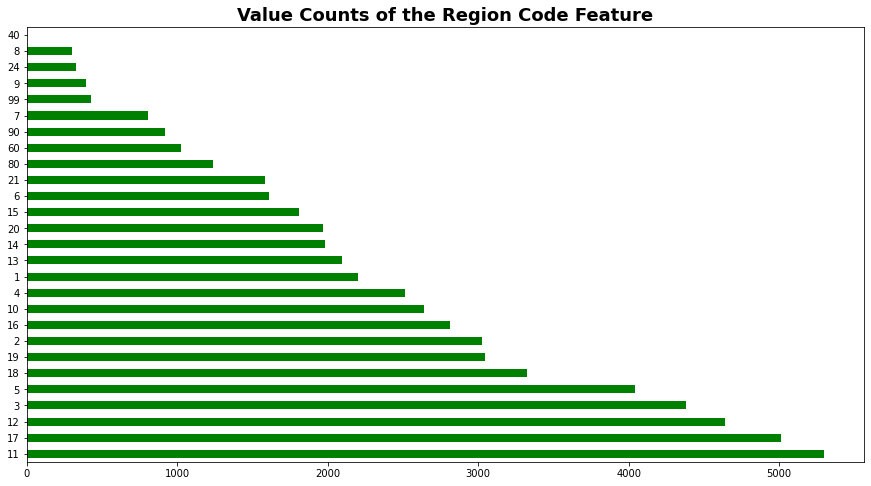

In [18]:
# Look at a bar plot for the values of region_code:
plt.figure(figsize=(15, 8), facecolor='white')
train['region_code'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Region Code Feature', size=18, weight='bold');

# Can feature engineer this feature into a regions feature.

In [19]:
# Look at a bar plot for the values of subvillage:
# plt.figure(figsize=(15, 50), facecolor='white')
# train['subvillage'].value_counts().plot(kind='barh', color='green')
# plt.title('Value Counts of the Subvillage Feature', size=18, weight='bold');

# This feature has very high cardinality and can not be visualized this way properly.
# Look  at the value counts of subvillage feature since this is a high cardinality feature:
train['subvillage'].value_counts().sort_values()

Kyaitoko                            1
Usiulize                            1
Nkkungi                             1
Kitupa                              1
Lusami                              1
Mwasengela A                        1
Walanga 'B'                         1
Mengo                               1
Milimbo                             1
Munguli                             1
Kabuta A                            1
Namatala                            1
Cikolola                            1
Mwamamumi                           1
Mapoko                              1
Isunya                              1
Mayoka                              1
Mwoneka Shulen                      1
Nyabusaro                           1
Jengalangulo                        1
Nambunde                            1
Butabare                            1
Mang'Onyi St                        1
Myau Asili                          1
Ibilingo C                          1
Samachi                             1
Rutunguru   

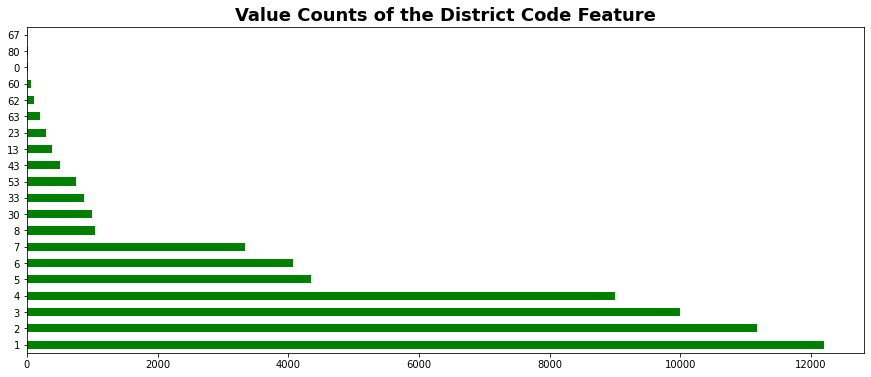

In [20]:
# Look at a bar plot for the values of district_code:
plt.figure(figsize=(15, 6), facecolor='white')
train['district_code'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the District Code Feature', size=18, weight='bold');

# Can feature engineer this feature into a regions feature.

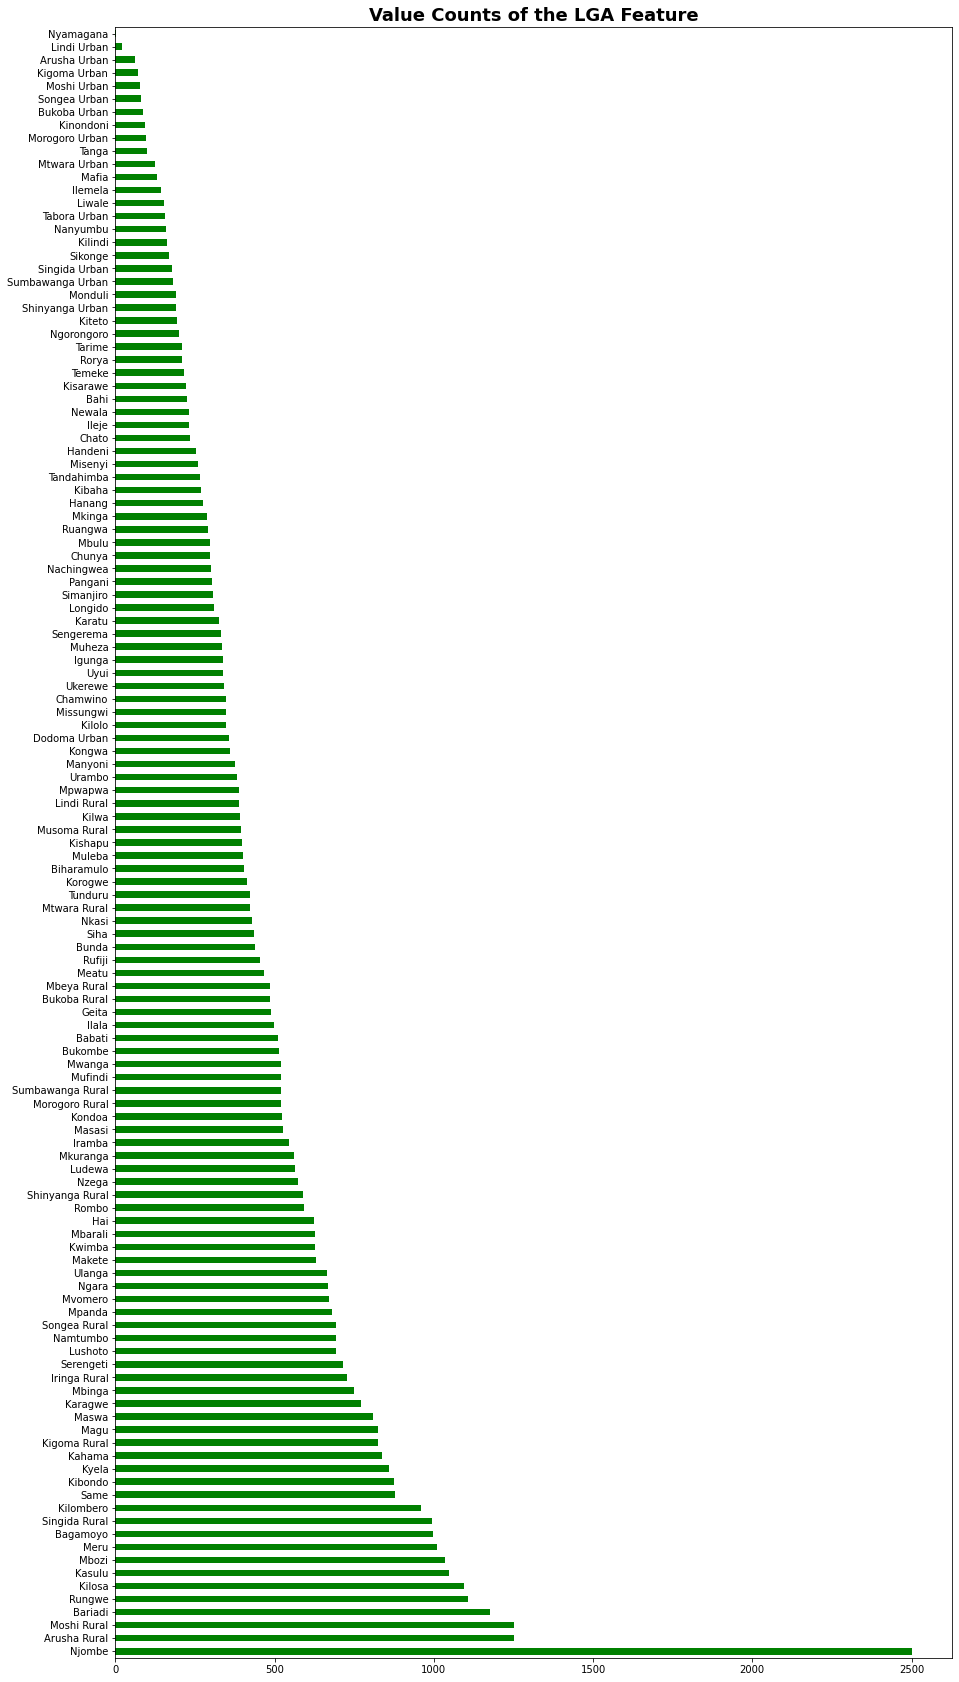

In [21]:
# Look at a bar plot for the values of lga:
plt.figure(figsize=(15, 30), facecolor='white')
train['lga'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the LGA Feature', size=18, weight='bold');

# Can feature engineer this feature into a regions feature.

In [22]:
# Look at a bar plot for the values of ward:
# plt.figure(figsize=(15, 50), facecolor='white')
# train['ward'].value_counts().plot(kind='barh', color='green')
# plt.title('Value Counts of the Ward Feature', size=18, weight='bold');

# This feature has very high cardinality and can not be visualized this way properly.
# Look  at the value counts of ward feature since this is a high cardinality feature:
train['ward'].value_counts().sort_values(ascending=False)

Igosi                      307
Imalinyi                   252
Siha Kati                  232
Mdandu                     231
Nduruma                    217
Kitunda                    203
Mishamo                    203
Msindo                     201
Chalinze                   196
Maji ya Chai               190
Usuka                      187
Ngarenanyuki               172
Chanika                    171
Vikindu                    162
Mtwango                    153
Matola                     145
Zinga/Ikerege              141
Wanging'ombe               139
Maramba                    139
Itete                      137
Magomeni                   135
Kikatiti                   134
Ifakara                    134
Olkokola                   133
Maposeni                   130
Mvomero                    129
Igongolo                   129
Mlangali                   125
Nkoma                      122
Nkungulu                   121
Mahongole                  121
Rujewa                     120
Simbo   

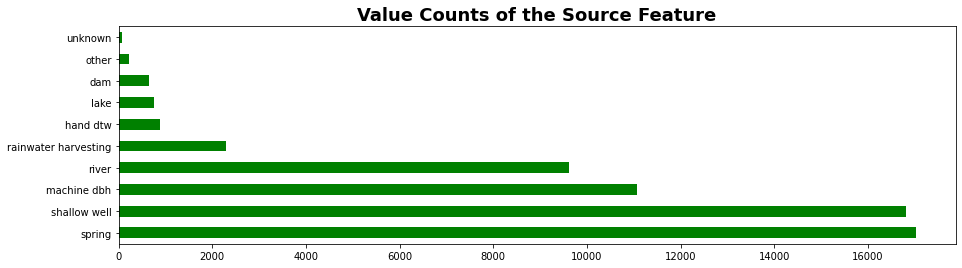

In [23]:
# Look at a bar plot for the values of source:
plt.figure(figsize=(15, 4), facecolor='white')
train['source'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Source Feature', size=18, weight='bold');

# Can feature engineer this feature into a sources feature.

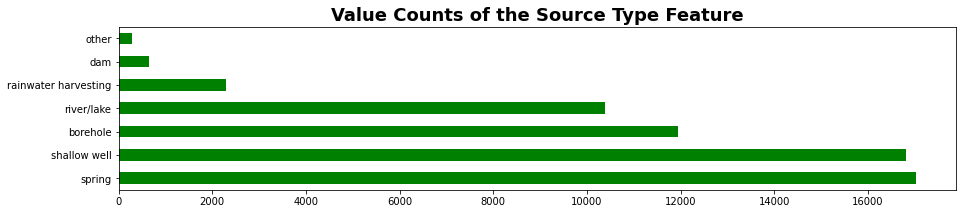

In [24]:
# Look at a bar plot for the values of source_type:
plt.figure(figsize=(15, 3), facecolor='white')
train['source_type'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Source Type Feature', size=18, weight='bold');

# Can feature engineer this feature into a sources feature.

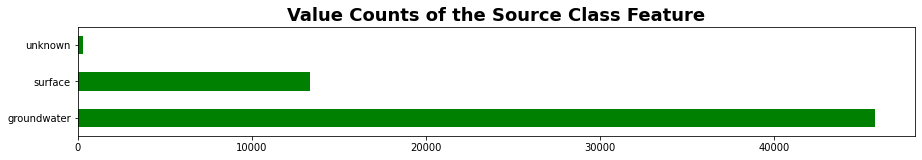

In [25]:
# Look at a bar plot for the values of source_class:
plt.figure(figsize=(15, 2), facecolor='white')
train['source_class'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Source Class Feature', size=18, weight='bold');

# Can feature engineer this feature into a sources feature.

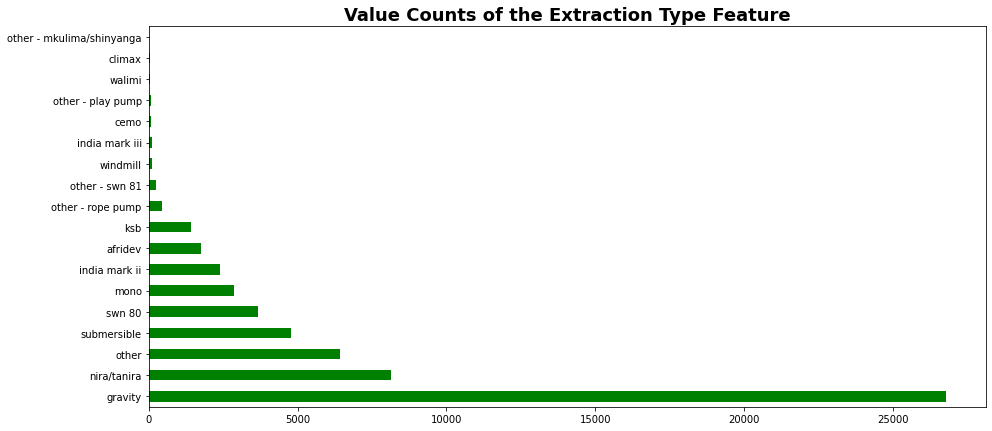

In [26]:
# Look at a bar plot for the values of extraction_type:
plt.figure(figsize=(15, 7), facecolor='white')
train['extraction_type'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Extraction Type Feature', size=18, weight='bold');

# Can feature engineer this feature into a extraction feature.

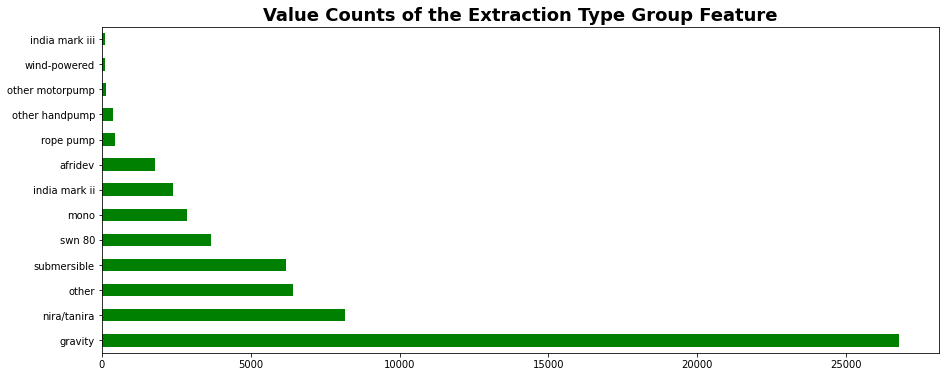

In [27]:
# Look at a bar plot for the values of extraction_type_group:
plt.figure(figsize=(15, 6), facecolor='white')
train['extraction_type_group'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Extraction Type Group Feature', size=18, weight='bold');

# Can feature engineer this feature into a extraction feature.

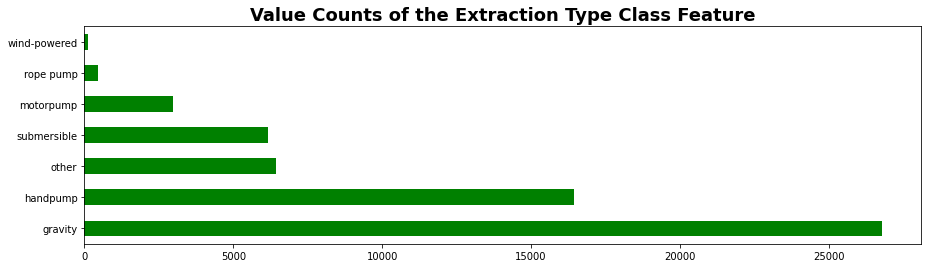

In [28]:
# Look at a bar plot for the values of extraction_type_class:
plt.figure(figsize=(15, 4), facecolor='white')
train['extraction_type_class'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Extraction Type Class Feature', size=18, weight='bold');

# Can feature engineer this feature into a extraction feature.

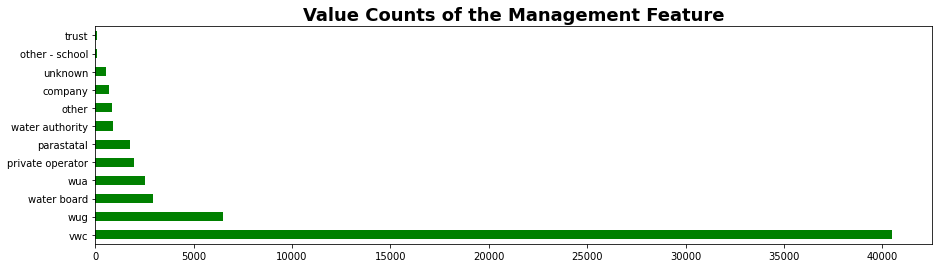

In [29]:
# Look at a bar plot for the values of management:
plt.figure(figsize=(15, 4), facecolor='white')
train['management'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Management Feature', size=18, weight='bold');

# Can feature engineer this feature into a manager feature.

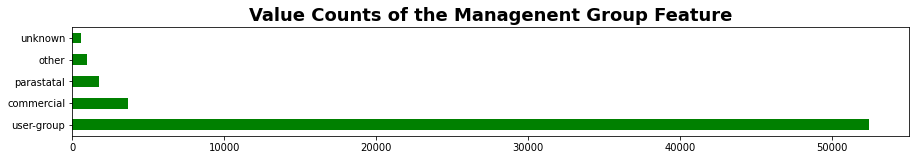

In [30]:
# Look at a bar plot for the values of management_group:
plt.figure(figsize=(15, 2), facecolor='white')
train['management_group'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Managenent Group Feature', size=18, weight='bold');

# Can feature engineer this feature into a manager feature.

In [31]:
# Look at a bar plot for the values of scheme_name:
# plt.figure(figsize=(15, 6), facecolor='white')
# train['scheme_name'].value_counts().plot(kind='barh', color='green')
# plt.title('Value Counts of the Scheme Name Feature', size=18, weight='bold');

# This feature has very high cardinality and can not be visualized this way properly.
# Look  at the value counts of scheme_name feature since this is a high cardinality feature:
train['scheme_name'].value_counts().sort_values(ascending=False)

K                                                 682
None                                              644
Borehole                                          546
Chalinze wate                                     405
M                                                 400
DANIDA                                            379
Government                                        320
Ngana water supplied scheme                       270
wanging'ombe water supply s                       261
wanging'ombe supply scheme                        234
Bagamoyo wate                                     229
I                                                 229
Uroki-Bomang'ombe water sup                       209
N                                                 204
Kirua kahe gravity water supply trust             193
Machumba estate pipe line                         185
Makwale water supplied sche                       166
Kijiji                                            161
S                           

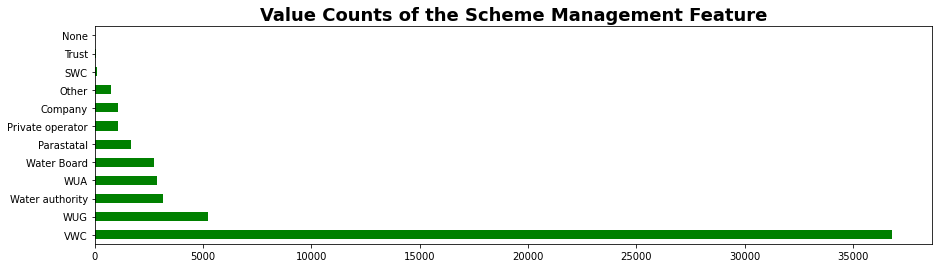

In [32]:
# Look at a bar plot for the values of scheme_management:
plt.figure(figsize=(15, 4), facecolor='white')
train['scheme_management'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Scheme Management Feature', size=18, weight='bold');

# Can feature engineer this feature into a manager feature.

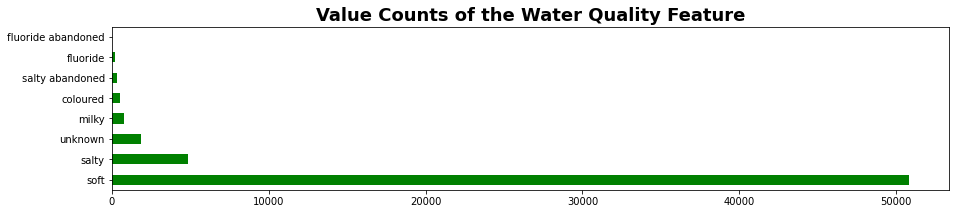

In [33]:
# Look at a bar plot for the values of water_quality:
plt.figure(figsize=(15, 3), facecolor='white')
train['water_quality'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Water Quality Feature', size=18, weight='bold');

# Can feature engineer this feature into a quality feature.

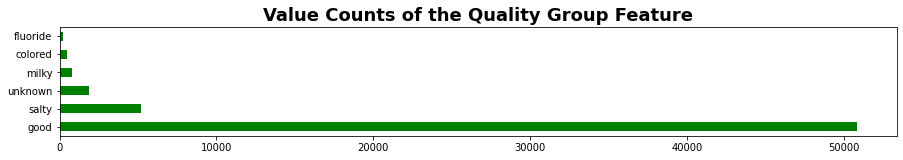

In [34]:
# Look at a bar plot for the values of quality_group:
plt.figure(figsize=(15, 2), facecolor='white')
train['quality_group'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Quality Group Feature', size=18, weight='bold');

# Can feature engineer this feature into a quality feature.

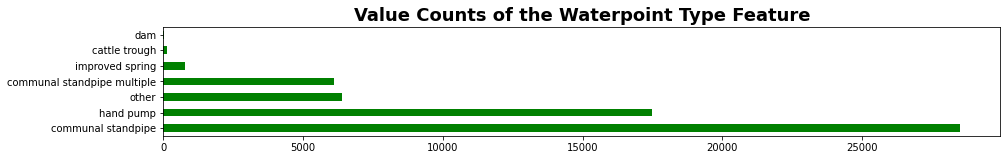

In [35]:
# Look at a bar plot for the values of waterpoint_type:
plt.figure(figsize=(15, 2), facecolor='white')
train['waterpoint_type'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Waterpoint Type Feature', size=18, weight='bold');

# Can feature engineer this feature into a waterpoint feature.

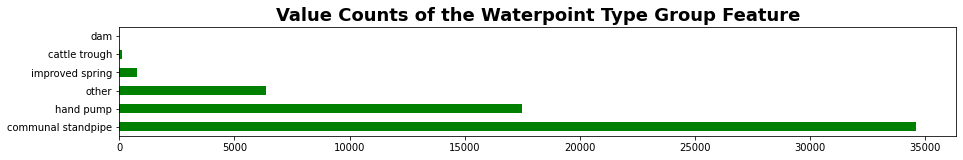

In [36]:
# Look at a bar plot for the values of waterpoint_type_group:
plt.figure(figsize=(15, 2), facecolor='white')
train['waterpoint_type_group'].value_counts().plot(kind='barh', color='green')
plt.title('Value Counts of the Waterpoint Type Group Feature', size=18, weight='bold');

# Can feature engineer this feature into a waterpoint feature.

### Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.

In [37]:
# Split the train dataset into train and validate:
train, val = train_test_split(train, train_size=0.85, test_size=0.15,
                              stratify=train['status_group'], random_state=42)

# Check my work by looking at the number of observations and features:
print ('Train set: Observations =', train.shape[0], 'and Features =', train.shape[1])
print ('Validation set: Observations =', val.shape[0], 'and Features =', val.shape[1])
print ('Test set: Observations =', test.shape[0], 'and Features =', test.shape[1])

Train set: Observations = 50490 and Features = 42
Validation set: Observations = 8910 and Features = 42
Test set: Observations = 14358 and Features = 41


In [38]:
# Create a function to clean the data some:
def wrangle(x):
  '''
  This will wrangle the train, validate, and test set in the same way.
  '''
  # Prevent SettingWithCopyWarning:
  x = x.copy()

  # Treat the outlier in latitude:
  x['latitude'] = x['latitude'].replace(-2e-08, 0)

  # Replace all the 1 clusters with 15 and 0 with 1:
  x['loc_cluster'] = x['loc_cluster'].replace(1, 15)
  x['loc_cluster'] = x['loc_cluster'].replace(0, 1)

  # Replace 15 cluster with NaN to impute later:
  x['loc_cluster'] = x['loc_cluster'].replace(15, np.nan)
  
  # Drop the longitude and latitude columns:
  x = x.drop(columns=['longitude', 'latitude'])

  # Replace 0's with NaN's (will impute later) when they don't belong and create missing columns:
  cols_w_zeros = ['construction_year', 'gps_height', 'population']
  for col in cols_w_zeros:
    x[col] = x[col].replace(0, np.nan)
    x[col+'_MISSING'] = x[col].isnull()

  # Drop cols that are not usable (never varies or always varies):
  x = x.drop(columns=['recorded_by', 'id'])

  # Drop duplicate or near dupllicate columns:
  x = x.drop(columns=['quantity_group'])
  
  # Convert date_recorded to datetime:
  x['date_recorded'] = pd.to_datetime(x['date_recorded'], infer_datetime_format=True)

  # Extract month, day, and year, then drop original:
  x['month_rec'] = x['date_recorded'].dt.month
  x['day_rec'] = x['date_recorded'].dt.day
  x['year_rec'] = x['date_recorded'].dt.year
  x = x.drop(columns='date_recorded')

  # Create some new features (year_rec - construction_year) and years missing:
  x['age_when_rec'] = x['year_rec'] - x['construction_year']
  x['ages_MISSING'] = x['age_when_rec'].isnull()

  # Change region_code and district_code to a string type:
  x['region_code'] = x['region_code'].astype(str)
  x['district_code'] = x['district_code'].astype(str)

  # Create a new feature (region + region_code) and drop originals:
  x['regions'] = x['region'].str.cat(x['region_code'], sep=' ').str.cat(x['lga'], 
                                                                         sep=' - ').str.cat(x['district_code'], sep=' ')
  x = x.drop(columns=['region', 'region_code', 'lga', 'district_code'])

  # Create a new feature (source, source_type, + source_class) and drop originals:
  x['sources'] = x['source_class'].str.cat(x['source_type'], sep=' - ').str.cat(x['source'], sep=' - ')
  x = x.drop(columns=['source', 'source_type', 'source_class'])

  # Create a new feature (source, source_type, + source_class) and drop originals:
  x['manager'] = x['management_group'].str.cat(x['management'], 
                                               sep=' - ').str.cat(x['scheme_management'], sep=' - ')
  x = x.drop(columns=['management_group', 'management', 'scheme_management'])

  # Create a new feature (extraction types) and drop originals:
  x['type_of_extraction'] = x['extraction_type_class'].str.cat(x['extraction_type_group'], 
                                                             sep=' - ').str.cat(x['extraction_type'], sep=' - ')
  x = x.drop(columns=['extraction_type_class', 'extraction_type_group', 'extraction_type'])

  # Create a new feature (source, source_type, + source_class) and drop originals:
  x['waterpoints'] = x['waterpoint_type'].str.cat(x['waterpoint_type_group'], sep=' - ')
  x = x.drop(columns=['waterpoint_type', 'waterpoint_type_group'])

  # Create a new feature (source, source_type, + source_class) and drop originals:
  x['quality_of_water'] = x['quality_group'].str.cat(x['water_quality'], sep=' - ')
  x = x.drop(columns=['quality_group', 'water_quality'])

  # Replace values with less than 2 count with other to reduce some of the noise in the dataset:
  val_ct_wpt = x['wpt_name'].value_counts()
  others_wpt = val_ct_wpt.index[val_ct_wpt < 2]
  x.loc[x['wpt_name'].isin(others_wpt), 'wpt_name'] = 'other'

  # Replace values with less than 2 count with other to reduce some of the noise in the dataset:
  val_ct_sub = x['subvillage'].value_counts()
  others_sub = val_ct_sub.index[val_ct_sub < 4]
  x.loc[x['subvillage'].isin(others_sub), 'subvillage'] = 'other'

  # Replace values with less than 20 count with other to reduce some of the noise in the dataset:
  val_ct_ward = x['ward'].value_counts()
  others_ward = val_ct_ward.index[val_ct_ward < 34]
  x.loc[x['ward'].isin(others_ward), 'ward'] = 'other'

  # Replace values with less than 4 count with other to reduce some of the noise in the dataset:
  val_ct_sch = x['scheme_name'].value_counts()
  others_sch = val_ct_sch.index[val_ct_sch < 11]
  x.loc[x['scheme_name'].isin(others_sch), 'scheme_name'] = 'other'

  # Return the new wrangled dataframe:
  return x

# Run the function on all 3 sets:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

# Check my work by looking at the first 3 rows of the train set:
train.head(3)

amount_tsh  ... quality_of_water
26290         0.0  ...      good - soft
59373      5000.0  ...      good - soft
21359        50.0  ...      good - soft

[3 rows x 33 columns]

In [39]:
# Show all values:
pd.set_option('display.max_rows', 10000)

# Look at the value counts of the new feature regions:
print ('Train Set:\n', train['regions'].value_counts())

Train Set:
 Iringa 11 - Njombe 4                2107
Kilimanjaro 3 - Moshi Rural 4       1035
Arusha 2 - Arusha Rural 2           1026
Shinyanga 17 - Bariadi 1             993
Mbeya 12 - Rungwe 4                  938
Morogoro 5 - Kilosa 1                936
Mbeya 12 - Mbozi 6                   880
Kigoma 16 - Kasulu 2                 877
Arusha 2 - Meru 7                    864
Singida 13 - Singida Rural 2         846
Pwani 6 - Bagamoyo 1                 834
Morogoro 5 - Kilombero 3             823
Kigoma 16 - Kibondo 1                777
Kilimanjaro 3 - Same 3               737
Mbeya 12 - Kyela 3                   736
Shinyanga 17 - Kahama 3              695
Shinyanga 17 - Maswa 2               691
Kagera 18 - Karagwe 1                654
Ruvuma 10 - Mbinga 3                 643
Iringa 11 - Iringa Rural 1           623
Kigoma 16 - Kigoma Rural 3           609
Mara 20 - Serengeti 2                607
Mwanza 19 - Magu 2                   601
Ruvuma 10 - Namtumbo 5               588
Tang

In [40]:
# Look at the value counts of the new feature sources:
print ('Train Set:\n', train['sources'].value_counts())

Train Set:
 groundwater - spring - spring                            14492
groundwater - shallow well - shallow well                14361
groundwater - borehole - machine dbh                      9361
surface - river/lake - river                              8175
surface - rainwater harvesting - rainwater harvesting     1945
groundwater - borehole - hand dtw                          735
surface - river/lake - lake                                626
surface - dam - dam                                        555
unknown - other - other                                    181
unknown - other - unknown                                   59
Name: sources, dtype: int64


In [41]:
# Look at the value counts of the new feature manager:
print ('Train Set:\n', train['manager'].value_counts())

Train Set:
 user-group - vwc - VWC                              30103
user-group - wug - WUG                               4060
user-group - wua - WUA                               2028
user-group - water board - Water Board               1830
parastatal - parastatal - Parastatal                 1298
user-group - vwc - Water authority                   1086
commercial - private operator - Private operator      802
commercial - water authority - Water authority        740
user-group - wug - VWC                                694
user-group - water board - Water authority            619
commercial - company - Company                        559
other - other - Other                                 435
user-group - vwc - WUG                                357
user-group - vwc - Water Board                        347
user-group - vwc - WUA                                210
commercial - private operator - Company               193
commercial - private operator - WUA                   169
co

In [42]:
# Look at the value counts of the new feature type_of_extraction:
print ('Train Set:\n', train['type_of_extraction'].value_counts())

Train Set:
 gravity - gravity - gravity                              22796
handpump - nira/tanira - nira/tanira                      6946
other - other - other                                     5526
submersible - submersible - submersible                   4006
handpump - swn 80 - swn 80                                3132
motorpump - mono - mono                                   2396
handpump - india mark ii - india mark ii                  2030
handpump - afridev - afridev                              1509
submersible - submersible - ksb                           1187
rope pump - rope pump - other - rope pump                  377
handpump - other handpump - other - swn 81                 196
wind-powered - wind-powered - windmill                      99
handpump - india mark iii - india mark iii                  78
motorpump - other motorpump - cemo                          76
handpump - other handpump - other - play pump               67
handpump - other handpump - walimi         

In [43]:
# Look at the value counts of the new feature waterpoints:
print ('Train Set:\n', train['waterpoints'].value_counts())

Train Set:
 communal standpipe - communal standpipe             24230
hand pump - hand pump                               14889
other - other                                        5461
communal standpipe multiple - communal standpipe     5135
improved spring - improved spring                     672
cattle trough - cattle trough                          98
dam - dam                                               5
Name: waterpoints, dtype: int64


In [44]:
# Look at the value counts of the new feature quality_of_water:
print ('Train Set:\n', train['quality_of_water'].value_counts())

Train Set:
 good - soft                      43157
salty - salty                     4146
unknown - unknown                 1595
milky - milky                      698
colored - coloured                 421
salty - salty abandoned            286
fluoride - fluoride                173
fluoride - fluoride abandoned       14
Name: quality_of_water, dtype: int64


In [45]:
# Define a function to wrangle new feature:
def wrangle_new(x):
  x['sources'] = x['sources'].replace({
      'groundwater - shallow well - shallow well':'groundwater - shallow well', 
      'groundwater - spring - spring':'groundwater - spring',
      'groundwater - borehole - machine dbh':'groundwater - machine borehole',
      'surface - river/lake - river':'surface - river', 
      'surface - rainwater harvesting - rainwater harvesting':'surface - rainwater',
      'groundwater - borehole - hand dtw':'groundwater - hand borehole',
      'surface - river/lake - lake':'surface - lake', 'surface - dam - dam':'surface - dam',
      'unknown - other - other':'unknown - other', 'unknown - other - unknown':'unknown - other'
      })
  
  x['manager'] = x['manager'].replace({
      'user-group - vwc - VWC':'user-group - VWC', 'user-group - wug - WUG':'user-group - WUG',
      'user-group - wua - WUA':'user-group - WUA', 
      'user-group - water board - Water Board':'user-group - Water Board',
      'parastatal - parastatal - Parastatal':'Parastatal',
      'user-group - vwc - Water authority':'user-group - vwc - Water authority', 
      'commercial - private operator - Private operator':'commercial - Private operator',
      'commercial - water authority - Water authority':'commercial - Water authority',
      'commercial - company - Company':'commercial - Company', 'other - other - Other':'Other',
      'parastatal - parastatal - VWC':'parastatal - parastatal - VWC',
      'other - other - school - SWC':'other - school - SWC', 
      'unknown - unknown - VWC':'unknown - VWC', 'commercial - trust - Trust':'commercial - Trust',
      'other - other - VWC':'other - VWC', 'other - other - Water authority':'other - Water authority',
      'parastatal - parastatal - WUA':'parastatal - WUA', 
      'parastatal - parastatal - Company':'parastatal - Company', 
      'other - other - Water Board':'other - Water Board', 'other - other - WUG':'other - WUG',
      'other - other - school - VWC':'other - school - VWC', 
      'unknown - unknown - Other':'unknown - Other', 'parastatal - parastatal - WUG':'parastatal - WUG',
      'other - other - Private operator':'other - Private operator',
      'unknown - unknown - Parastatal':'unknown - Parastatal', 
      'unknown - unknown - WUG':'unknown - WUG', 
      'parastatal - parastatal - Private operator':'parastatal - Private operator',
      'other - other - Company':'other - Company', 'other - other - WUA':'other - WUA',
      'parastatal - parastatal - Trust':'parastatal - Trust', 
      'parastatal - parastatal - Water Board':'parastatal - Water Board', 
      'unknown - unknown - WUA':'unknown - WUA', 'parastatal - parastatal - Other':'parastatal - Other'
      })
  
  x['type_of_extraction'] = x['type_of_extraction'].replace({
      'gravity - gravity - gravity':'gravity', 'handpump - nira/tanira - nira/tanira':'handpump - nira/tanira',
      'other - other - other':'other', 'submersible - submersible - submersible':'submersible',
      'handpump - swn 80 - swn 80':'handpump - swn 80', 
      'motorpump - mono - mono':'motorpump - mono', 
      'handpump - india mark ii - india mark ii':'handpump - india mark ii', 
      'handpump - afridev - afridev':'handpump - afridev', 
      'submersible - submersible - ksb':'submersible - ksb', 
      'rope pump - rope pump - other - rope pump':'rope pump',
      'handpump - other handpump - other - swn 81':'handpump - swn 81',
      'wind-powered - wind-powered - windmill':'wind-powered - windmill',
      'handpump - india mark iii - india mark iii':'handpump - india mark iii'
      })
  
  x['waterpoints'] = x['waterpoints'].replace({
      'communal standpipe - communal standpipe':'communal standpipe',
      'hand pump - hand pump':'hand pump', 'other - other':'other', 
      'communal standpipe multiple - communal standpipe':'communal standpipe multiple', 
      'improved spring - improved spring':'improved spring', 
      'cattle trough - cattle trough':'cattle trough', 'dam - dam':'dam'
      })
  
  x['quality_of_water'] = x['quality_of_water'].replace({
      'salty - salty':'salty', 'unknown - unknown':'unknown', 'milky - milky':'milky', 
      'colored - coloured':'colored', 'fluoride - fluoride':'fluoride'
      })
  
  # Return the new wrangled dataframe:
  return x

# Run function on all 3 sets:
train = wrangle_new(train)
val = wrangle_new(val)
test = wrangle_new(test)

# Check my work:
train.head()

amount_tsh  ... quality_of_water
26290         0.0  ...      good - soft
59373      5000.0  ...      good - soft
21359        50.0  ...      good - soft
23742         0.0  ...      good - soft
43676         0.0  ...      good - soft

[5 rows x 33 columns]

In [46]:
# Find the majority class and basline of the target feature in the train set:
train['status_group'].value_counts(normalize=True)

functional                 0.543078
non functional             0.384235
functional needs repair    0.072688
Name: status_group, dtype: float64

In [47]:
# Find the majority class and baseline of the target feature in the validate set:
val['status_group'].value_counts(normalize=True)

functional                 0.543098
non functional             0.384287
functional needs repair    0.072615
Name: status_group, dtype: float64

In [48]:
# Look at the shape of all 3 sets:
print ('Train Set: Observations =', train.shape[0], 'Features =', train.shape[1], '\n')
print ('Validation Set: Observations =', val.shape[0], 'Features =', val.shape[1], '\n')
print ('Test Set: Observations =', test.shape[0], 'Features =', test.shape[1])

Train Set: Observations = 50490 Features = 33 

Validation Set: Observations = 8910 Features = 33 

Test Set: Observations = 14358 Features = 32


In [49]:
# Create target variable:
target = 'status_group'

# Create features variable:
features = train.drop(columns=[target]).columns.tolist()

# Arrange data into X features matrices and y target vectors:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [50]:
# Look at the value counts for age_when_rec and MISSING columns:
print ('Age when Recorded:\n', train['age_when_rec'].value_counts(ascending=False), '\n')
print ('Age when Recorded Missing Values:\n', train['ages_MISSING'].value_counts(ascending=False), '\n')
print ('Year Built Missing Values:\n', train['construction_year_MISSING'].value_counts(ascending=False), '\n')
print ('GPS Height Missing Values:\n', train['gps_height_MISSING'].value_counts(ascending=False), '\n')
print ('Population Missing Values:\n', train['population_MISSING'].value_counts(ascending=False))

Age when Recorded:
  3.0     2351
 1.0     1964
 2.0     1799
 5.0     1679
 4.0     1608
 13.0    1591
 7.0     1186
 6.0     1165
 11.0    1156
 8.0      991
 14.0     981
 33.0     933
 15.0     834
 23.0     780
 10.0     724
 16.0     722
 9.0      710
 18.0     652
 27.0     636
 19.0     634
 31.0     615
 28.0     583
 35.0     545
 17.0     537
 37.0     527
 39.0     516
 0.0      501
 21.0     499
 25.0     491
 26.0     491
 12.0     482
 29.0     475
 20.0     473
 41.0     428
 38.0     307
 30.0     302
 43.0     300
 22.0     272
 36.0     258
 24.0     215
 40.0     194
 34.0     160
 32.0     143
 42.0      78
 53.0      76
 50.0      74
 45.0      58
 46.0      42
 44.0      40
 48.0      36
 49.0      23
 51.0      23
 47.0      14
 52.0       9
-5.0        3
-4.0        2
-2.0        1
-7.0        1
-3.0        1
-1.0        1
Name: age_when_rec, dtype: int64 

Age when Recorded Missing Values:
 False    32892
True     17598
Name: ages_MISSING, dtype: int64 

Year 

### Try Ordinal Encoding and Random Forest Classifier.


In [51]:
# Make a pipeline to use ordinal encoding and random forest classifier:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(random_state=97, n_jobs=-1)
)

# Fit on train set and score on validate set:
pipeline.fit(X_train, y_train)
print ('Validation Accuracy Score:', pipeline.score(X_val, y_val))

Validation Accuracy Score: 0.7986531986531986


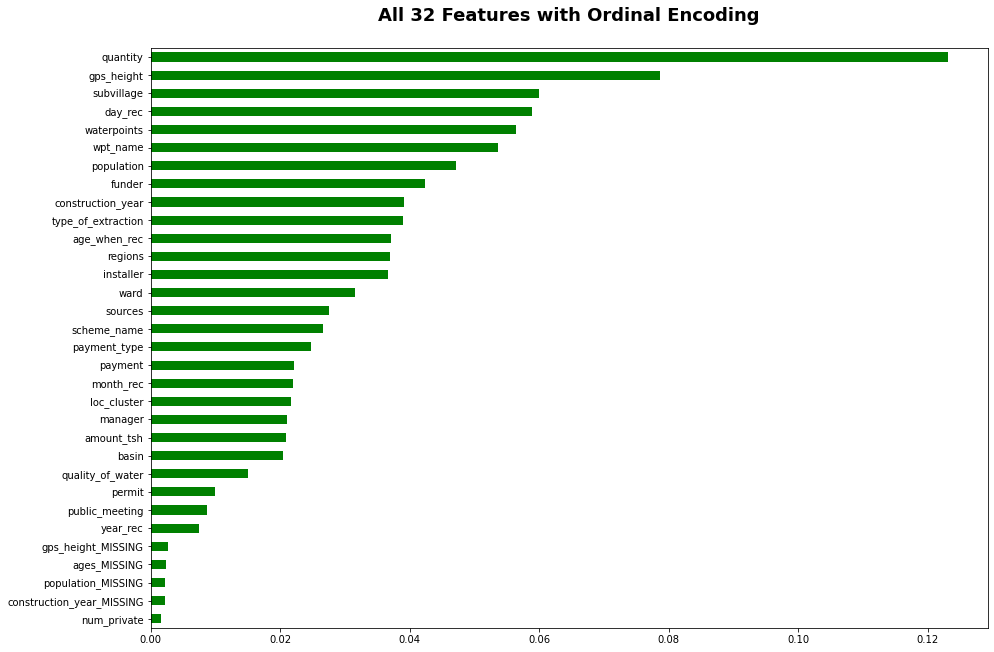

In [52]:
# Encode:
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

# Pull out random forest classifier to get feature importances:
rfc = pipeline.named_steps['randomforestclassifier']

# Define a series that includes the feature importances:
importances = pd.Series(rfc.feature_importances_, encoded.columns)

# Plot the top n features:
n = 32
plt.figure(figsize=(15, n/3), facecolor='white')
plt.title(f'All {n} Features with Ordinal Encoding\n', size=18, weight='bold')
importances.sort_values()[-n:].plot.barh(color='green');

In [53]:
# Look at the list of columns for X_train:
X_train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'ward', 'population',
       'public_meeting', 'scheme_name', 'permit', 'construction_year',
       'payment', 'payment_type', 'quantity', 'loc_cluster',
       'construction_year_MISSING', 'gps_height_MISSING', 'population_MISSING',
       'month_rec', 'day_rec', 'year_rec', 'age_when_rec', 'ages_MISSING',
       'regions', 'sources', 'manager', 'type_of_extraction', 'waterpoints',
       'quality_of_water'],
      dtype='object')

In [54]:
# Create a list of features to use in my model:
  # Removed [, 'population_MISSING', 'gps_height_MISSING', 'construction_year_MISSING', 'ages_MISSING', 
            # 'num_private', 'wpt_name']
features = ['quantity', 'gps_height', 'subvillage', 'day_rec', 'waterpoints', 'population', 
            'funder', 'construction_year', 'type_of_extraction', 'age_when_rec', 'regions', 'installer', 'ward', 
            'sources', 'scheme_name', 'payment_type', 'payment', 'month_rec', 'loc_cluster', 'manager', 
            'amount_tsh', 'basin', 'quality_of_water', 'permit', 'public_meeting', 'year_rec']

# Re-arrange X feature matrix to include only the above features:
X_train1 = X_train[features]
X_val1 = X_val[features]
X_test1 = X_test[features]
  
# Make a pipeline for the decision tree:
rf_pipe = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(strategy='median'), 
                        RandomForestClassifier(n_jobs=-1, random_state=97, 
                                               min_samples_leaf=2)
    )
  
# Fit to train and score on validation set:
rf_pipe.fit(X_train1, y_train)
train_score = rf_pipe.score(X_train1, y_train)
val_score = rf_pipe.score(X_val1, y_val)

# Predict on the test set:
y_pred = rf_pipe.predict(X_test1)
  
print ('Random Forest Train Accuracy Score:', train_score)
print ('Random Forest Validation Accuracy Score:', val_score, '\n')
print ('Differance between Train and Validate Scores:', train_score - val_score)

Random Forest Train Accuracy Score: 0.92123192711428
Random Forest Validation Accuracy Score: 0.8034792368125702 

Differance between Train and Validate Scores: 0.11775269030170987


### Submit your predictions to our Kaggle competition.  <--- DONE !

- Go to our Kaggle InClass competition webpage. 
- Use the blue **Submit Predictions** button to upload your CSV file. 
- Or you can use the Kaggle API to submit your predictions.

### Commit your notebook to your fork of the GitHub repo.  <--- DONE !

In [55]:
# Get submission cvs to upload to Kaggle Challenge:
submission=sample_submission[['id']].copy()
submission['status_group']=y_pred
submission.to_csv('Joanne_Middour_Submission13.csv',index=False)

In [56]:
submission.head()

id    status_group
0  50785      functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional

## Stretch Goals

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

###  Add your own stretch goal(s) !

- 

### Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.



### Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).


### Get and plot your feature importances.


### Make visualizations and share on Slack.